CALCULATION OF SHARPE RATIO AND CAPM RETURNS


In [1]:
import pandas as pd
# Inputs
risk_free_rate = 0.0234
market_return = 0.116

# Stock Data
stocks = {
    'Delphi': {'return': 0.091, 'std_dev': 0.246, 'beta': 1.29},
    'Groupon': {'return': 0.093, 'std_dev': 0.671, 'beta': 1.44},
    'Kellogg': {'return': 0.046, 'std_dev': 0.146, 'beta': 0.54},
    'Kinross': {'return': 0.084, 'std_dev': 0.650, 'beta': 0.31},
}

# CAPM Function
def capm_expected_return(beta, rf, rm):
    return rf + beta * (rm - rf)

# Compute
results = {}
for stock, data in stocks.items():
    capm_ret = capm_expected_return(data['beta'], risk_free_rate, market_return)
    sharpe = (data['return'] - risk_free_rate) / data['std_dev']
    results[stock] = {
        'Anticipated Return': data['return'],
        'CAPM Return': capm_ret,
        'Sharpe Ratio': sharpe
    }

# Output
result = pd.DataFrame(results).T
result


,Anticipated Return,CAPM Return,Sharpe Ratio
Delphi,0.091,0.142854,0.274797
Groupon,0.093,0.156744,0.103726
Kellogg,0.046,0.073404,0.154795
Kinross,0.084,0.052106,0.093231


PLOTTING CAPM RETURNS AND ANTICIPATED RETURNS WITH SML LINE TO COMPARE

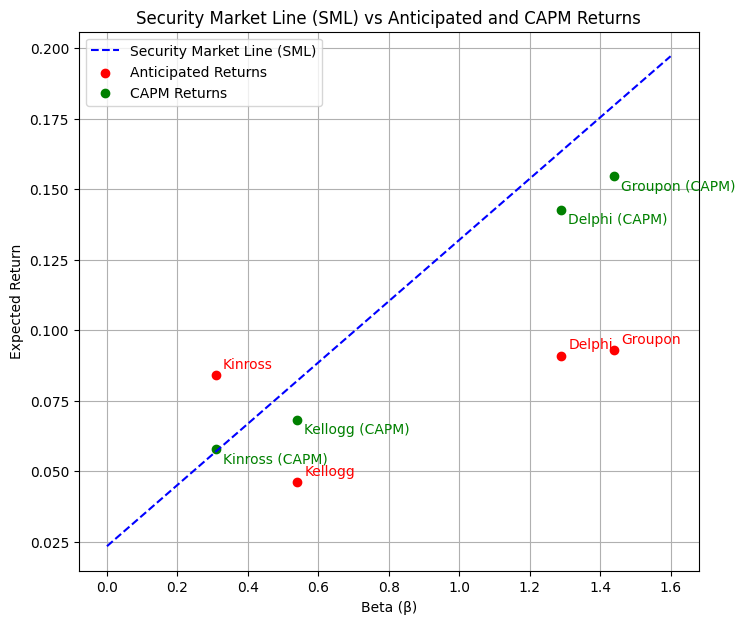

In [6]:
import matplotlib.pyplot as plt

# Stock data
stocks = ['Delphi', 'Groupon', 'Kellogg', 'Kinross']
betas = [1.29, 1.44, 0.54, 0.31]
expected_returns = [0.091, 0.093, 0.046, 0.084]  # Anticipated returns
capm_returns = [0.1428, 0.1546, 0.0683, 0.0577]  # CAPM returns

# Risk-free rate and Market Risk Premium
rf = 0.0234  # 2.34%
mrp = 0.1086  # 10.86%

# SML line data
beta_range = [0, 1.6]
sml_returns = [rf + b * mrp for b in beta_range]

# Plot
plt.figure(figsize=(8, 7))
plt.plot(beta_range, sml_returns, label='Security Market Line (SML)', color='blue', linestyle='--')
plt.scatter(betas, expected_returns, color='red', label='Anticipated Returns')
plt.scatter(betas, capm_returns, color='green', label='CAPM Returns')

# Labels for each point
for i, stock in enumerate(stocks):
    plt.annotate(stock, (betas[i], expected_returns[i]), textcoords="offset points", xytext=(5,5), ha='left', color='red')
    plt.annotate(stock + " (CAPM)", (betas[i], capm_returns[i]), textcoords="offset points", xytext=(5,-10), ha='left', color='green')

plt.title('Security Market Line (SML) vs Anticipated and CAPM Returns')
plt.xlabel('Beta (β)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()


BENCHMARKING WITH S&P 500 INDEX


/tmp/ipython-input-8-1587084356.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stocks_df.loc[len(stocks_df.index)] = [


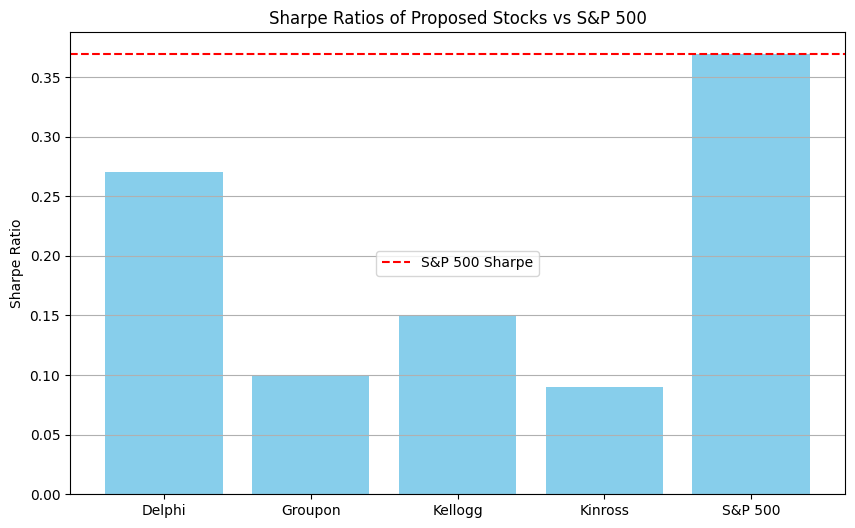

,Stock,Anticipated Return,Standard Deviation,Beta,CAPM Return,Sharpe Ratio
0,Delphi,0.09100,0.246000,1.29,0.1428,0.270000
1,Groupon,0.09300,0.671000,1.44,0.1546,0.100000
2,Kellogg,0.04600,0.146000,0.54,0.0683,0.150000
3,Kinross,0.08400,0.650000,0.31,0.0577,0.090000
4,S&P 500,0.60254,0.217573,1.00,NaN,0.369128


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("/content/data.csv")

# Weekly returns for S&P 500
sp500_weekly_returns = df['S&P 500']
sp500 = pd.Series(sp500_weekly_returns)

# Calculate statistics for S&P 500
sp500_mean = sp500.mean()
sp500_std = sp500.std()
rf_weekly = 0.0234 / 52  # Weekly risk-free rate
sp500_sharpe = (sp500_mean - rf_weekly) / sp500_std

# Proposed stock data
data = {
    'Stock': ['Delphi', 'Groupon', 'Kellogg', 'Kinross'],
    'Anticipated Return': [0.091, 0.093, 0.046, 0.084],
    'Standard Deviation': [0.246, 0.671, 0.146, 0.650],
    'Beta': [1.29, 1.44, 0.54, 0.31],
    'CAPM Return': [0.1428, 0.1546, 0.0683, 0.0577],
    'Sharpe Ratio': [0.27, 0.10, 0.15, 0.09]
}
stocks_df = pd.DataFrame(data)

# S&P 500
stocks_df.loc[len(stocks_df.index)] = [
    'S&P 500',
    sp500_mean * 52,
    sp500_std * (52**0.5),
    1.0,
    None,
    sp500_sharpe
]

# Plot Sharpe Ratios
plt.figure(figsize=(10, 6))
plt.bar(stocks_df['Stock'], stocks_df['Sharpe Ratio'], color='skyblue')
plt.axhline(sp500_sharpe, color='red', linestyle='--', label='S&P 500 Sharpe')
plt.title('Sharpe Ratios of Proposed Stocks vs S&P 500')
plt.ylabel('Sharpe Ratio')
plt.grid(axis='y')
plt.legend()
plt.show()

# Display table

stocks_df

OPTIMAL PORTFOLIO CONSTRUCTION WITH DIVERSIFIVCATION

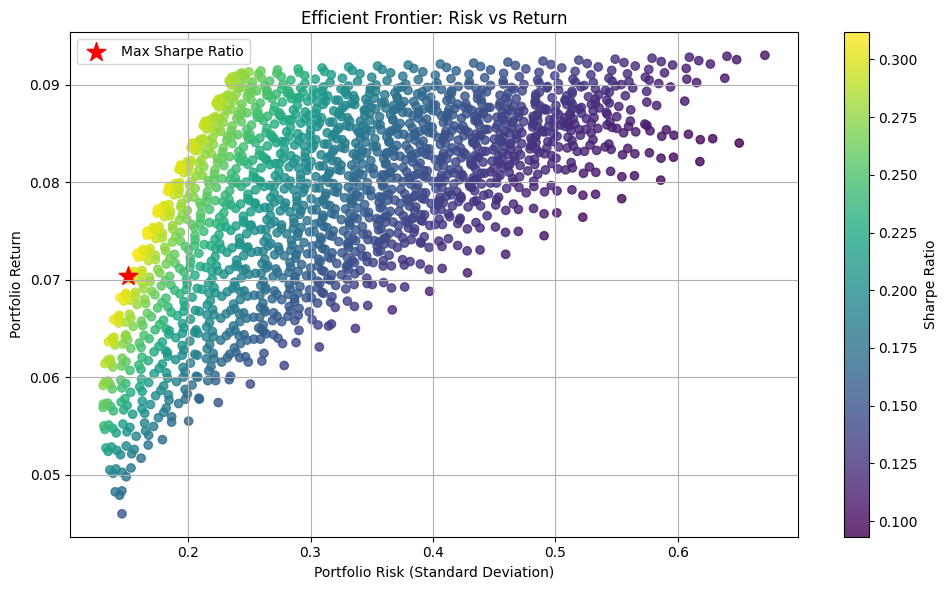

array([np.float64(0.07039999999999999), np.float64(0.15076881308811846),
       np.float64(0.31173555748913623), array([0.5 , 0.  , 0.45, 0.05])],
      dtype=object)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Stock data: Expected returns and standard deviations
stocks = ['Delphi', 'Groupon', 'Kellogg', 'Kinross']
expected_returns = np.array([0.091, 0.093, 0.046, 0.084])
std_devs = np.array([0.246, 0.671, 0.146, 0.650])

#randomly taken
correlation_matrix = np.array([
    [1.0, 0.2, 0.1, 0.05],
    [0.2, 1.0, 0.1, 0.3],
    [0.1, 0.1, 1.0, 0.05],
    [0.05, 0.3, 0.05, 1.0]
])

# Covariance matrix = correlation * outer product of std_devs
cov_matrix = correlation_matrix * np.outer(std_devs, std_devs)

# Portfolio combinations (grid of weights for 4 stocks summing to 1)
results = []
step = 0.05
for w1 in np.arange(0, 1 + step, step):
    for w2 in np.arange(0, 1 - w1 + step, step):
        for w3 in np.arange(0, 1 - w1 - w2 + step, step):
            w4 = 1 - w1 - w2 - w3
            weights = np.array([w1, w2, w3, w4])
            port_return = np.dot(weights, expected_returns)
            port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
            port_std_dev = np.sqrt(port_variance)
            sharpe_ratio = (port_return - 0.0234) / port_std_dev
            results.append((port_return, port_std_dev, sharpe_ratio, weights))

# Convert results to array
results = np.array(results, dtype=object)

# Find max Sharpe ratio
max_sharpe_idx = np.argmax(results[:, 2])
max_sharpe_port = results[max_sharpe_idx]

# Plot efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[:, 1], results[:, 0], c=results[:, 2], cmap='viridis', alpha=0.8)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], c='red', marker='*', s=200, label='Max Sharpe Ratio')
plt.title('Efficient Frontier: Risk vs Return')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

max_sharpe_port

PORTFOLIO DIVERSIFICATION REPRESENTATION

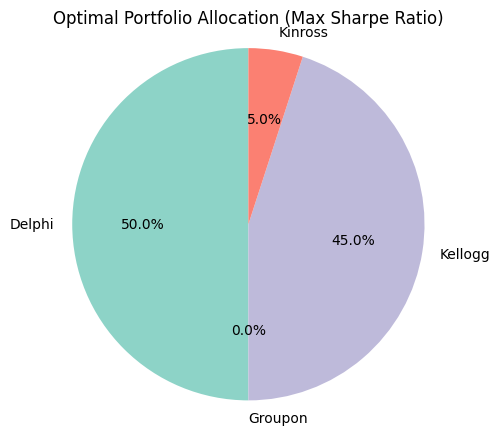

In [15]:
import matplotlib.pyplot as plt

# Optimal weights for the maximum Sharpe Ratio portfolio (example values)
stock_labels = ['Delphi', 'Groupon', 'Kellogg', 'Kinross']
optimal_weights = [0.50, 0, 0.45, 0.05]  # Example weights

# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(optimal_weights, labels=stock_labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Optimal Portfolio Allocation (Max Sharpe Ratio)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
